# SVM random split

What Techniques to Use When

https://machinelearningmastery.com/evaluate-performance-machine-learning-algorithms-python-using-resampling/

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('sample_gender_data.csv') 
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [2]:
# Handling Missing Values

from sklearn.preprocessing import Imputer #class
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0) # an instance of the class with these properties
imputer = imputer.fit(X[:, 0:2])         # we have to choose the columns with missing values
X[:, 0:2] = imputer.transform(X[:, 0:2])           # replace the X values for the columns averages

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)  
                     # random_state -> random, but a fixed random.

# Feature Scaling
from sklearn.preprocessing import StandardScaler # x_stand = (x-mean(x))/std(x)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# =============================================================================
# from sklearn.preprocessing import MinMaxScaler # Normalization x_norm = (x- min(x))/(max(x)-min(x))
# sc = MinMaxScaler(feature_range=(0, 1))
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# =============================================================================

"""
End of data processing part.
"""

C:\Users\Miklos.AKL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'\nEnd of data processing part.\n'

In [3]:
# Fitting SVM classifier to the Training set
from sklearn.svm import SVC # this is a class
classifier = SVC(kernel = 'rbf', random_state = 0) 
classifier.fit(X_train, y_train)    # This practically compels Xs with y-ones

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [4]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

precision, recall, fscore, support = score(y_test, y_pred)

print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F-score: {}'.format(fscore))
print('Support: {}'.format(support))

Accuracy: 0.7
Precision: [ 0.7826087   0.62962963]
Recall: [ 0.64285714  0.77272727]
F-score: [ 0.70588235  0.69387755]
Support: [28 22]


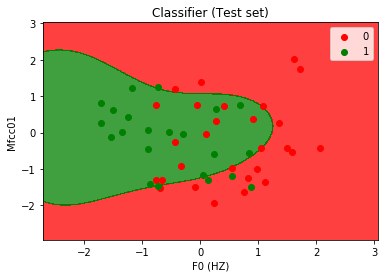

In [5]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('F0 (HZ)')
plt.ylabel('Mfcc01')
plt.legend()
plt.show()